## Load necessary tools

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [22]:
df = pd.read_csv('chembl22_lipinski.csv')

In [23]:
df.head()

,ChEMBL_ID,SMILES,MW,log_p,H_donors,H_acceptors,NHA,TPSA,Lipinski
0,CHEMBL17564,C,16.031300,0.6361,0.0,0.0,1.0,0.00,1
1,CHEMBL14688,CO,32.026215,-0.3915,1.0,1.0,2.0,20.23,1
2,CHEMBL43280,CN,31.042199,-0.4251,1.0,1.0,2.0,26.02,1
3,CHEMBL116838,CF,34.021878,0.5857,0.0,0.0,2.0,0.00,1
4,CHEMBL135626,CC,30.046950,1.0262,0.0,0.0,2.0,0.00,1


## Inspect dataset

In [24]:
df.info()
print(f"Original Row Count: {df.shape[0]}")
print(f"Columns: {list(df.columns)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502539 entries, 0 to 1502538
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ChEMBL_ID    1502539 non-null  object 
 1   SMILES       1502539 non-null  object 
 2   MW           1502539 non-null  float64
 3   log_p        1502539 non-null  float64
 4   H_donors     1502539 non-null  float64
 5   H_acceptors  1502539 non-null  float64
 6   NHA          1502539 non-null  float64
 7   TPSA         1502539 non-null  float64
 8   Lipinski     1502539 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 103.2+ MB
Original Row Count: 1502539
Columns: ['ChEMBL_ID', 'SMILES', 'MW', 'log_p', 'H_donors', 'H_acceptors', 'NHA', 'TPSA', 'Lipinski']


## Dataset Cleaning

In [25]:
df_clean = df.dropna()
print(f"Row Count after cleaning: {df_clean.shape[0]}")

Row Count after cleaning: 1502539


## Lipinski rules

In [26]:
# Molecular Weight (MW) ≤ 500
# LogP ≤ 5
# H-Donors ≤ 5
# H-Acceptors ≤ 10

## Calculate Lipinski rule violations

In [27]:
# A fuction is cretaed to count how many rules a molecule breaks
def count_violations(row):
    violations = 0
    if row['MW'] > 500: violations += 1
    if row['log_p'] > 5: violations += 1
    if row['H_donors'] > 5: violations += 1
    if row['H_acceptors'] > 10: violations += 1
    return violations

In [28]:
# Function is applied to every row in the dataset
df_clean['Violation Count'] =  df_clean.apply(count_violations, axis = 1)
df_clean

,ChEMBL_ID,SMILES,MW,log_p,H_donors,H_acceptors,NHA,TPSA,Lipinski,Violation Count
0,CHEMBL17564,C,16.031300,0.63610,0.0,0.0,1.0,0.00,1,0
1,CHEMBL14688,CO,32.026215,-0.39150,1.0,1.0,2.0,20.23,1,0
2,CHEMBL43280,CN,31.042199,-0.42510,1.0,1.0,2.0,26.02,1,0
3,CHEMBL116838,CF,34.021878,0.58570,0.0,0.0,2.0,0.00,1,0
4,CHEMBL135626,CC,30.046950,1.02620,0.0,0.0,2.0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...
1502534,CHEMBL1631334,CN(C)P(=O)(OCC1CN(CC(O1)n1cnc2c1NC(N)=NC2=O)P(...,9969.931907,-12.05155,71.0,208.0,678.0,3667.48,0,3
1502535,CHEMBL1077161,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,9745.484445,-28.69698,95.0,267.0,651.0,4497.11,0,3
1502536,CHEMBL1077165,n1(cnc2c1N=C(N)NC2=O)C1OC(COP(O)(=O)OC2C(COP(O...,10183.567262,-27.95436,97.0,276.0,681.0,4635.42,0,3
1502537,CHEMBL1077164,CC1=CN(C2CC(OP(O)(=O)OCC3OC(C(O)C3OP(O)(=O)OCC...,10092.536296,-30.16516,98.0,276.0,674.0,4638.22,0,3


## Label Status

In [30]:
df_clean['Lipinski_Status'] = df_clean['Violation Count'].apply(lambda x: 'Pass' if x == 0 else 'Fail')

# Check our work
print(df_clean[['MW', 'log_p', 'Violation Count', 'Lipinski_Status']].head())

          MW   log_p  Violation Count Lipinski_Status
0  16.031300  0.6361                0            Pass
1  32.026215 -0.3915                0            Pass
2  31.042199 -0.4251                0            Pass
3  34.021878  0.5857                0            Pass
4  30.046950  1.0262                0            Pass


## Univariate Analysis (The Population Scan)

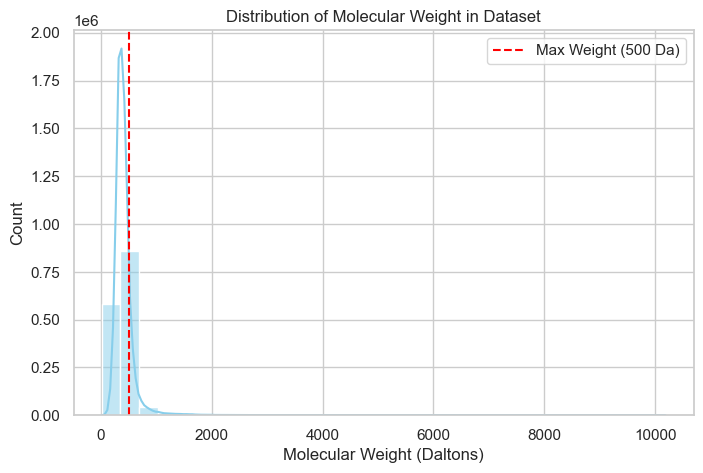

In [35]:
# --- STEP 6: MOLECULAR WEIGHT DISTRIBUTION ---
plt.figure(figsize=(8, 5))
sns.set_theme(style="whitegrid")

# Create a histogram with a Kernel Density Estimate (KDE) line
sns.histplot(data=df_clean, x='MW', kde=True, color='skyblue', bins=30)

# Add lines to show the "Lipinski Limit"
plt.axvline(x=500, color='red', linestyle='--', label='Max Weight (500 Da)')

plt.title("Distribution of Molecular Weight in Dataset")
plt.xlabel("Molecular Weight (Daltons)")
plt.legend()
plt.show()

## Bivariate Analysis (The Correlations)

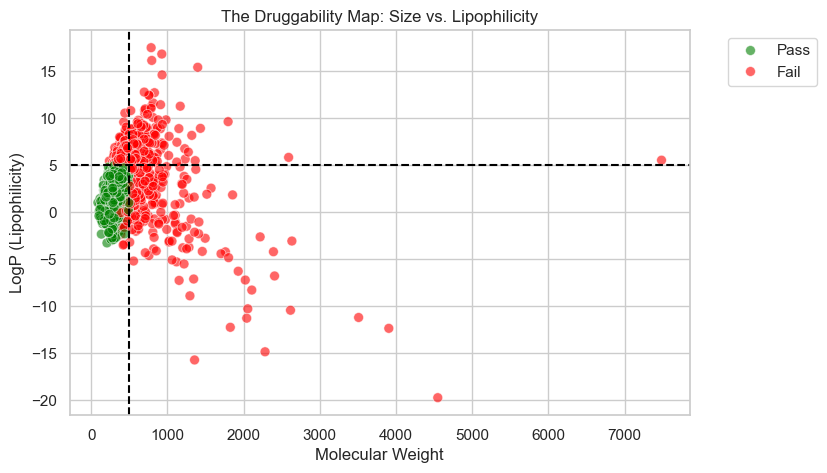

In [40]:
# --- STEP 7: THE LIPINSKI SCATTER PLOT ---
plt.figure(figsize=(8, 5))
df_viz = df_clean.sample(n=5000, random_state=42)

# We scatter MW (x) vs LogP (y)
# We color the dots (hue) based on whether they Pass or Fail our rule
sns.scatterplot(
    data=df_viz, 
    x='MW', 
    y='log_p', 
    hue='Lipinski_Status', 
    palette={'Pass': 'green', 'Fail': 'red'}, # Custom colors
    alpha=0.6, # Make dots transparent so we can see overlaps
    s=50       # Size of dots
)

# Draw the "Safe Zone" box
plt.axvline(x=500, color='black', linestyle='--')
plt.axhline(y=5, color='black', linestyle='--')

plt.title("The Druggability Map: Size vs. Lipophilicity")
plt.xlabel("Molecular Weight")
plt.ylabel("LogP (Lipophilicity)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Summary Statistics

In [41]:
# Count how many passed vs failed
status_counts = df_clean['Lipinski_Status'].value_counts()
pass_rate = (status_counts['Pass'] / df_clean.shape[0]) * 100

print(f"\n--- FINAL REPORT ---")
print(f"Total Compounds Analyzed: {df_clean.shape[0]}")
print(f"Compounds Passed (Strict): {status_counts['Pass']}")
print(f"Compounds Failed: {status_counts['Fail']}")
print(f"Pass Rate: {pass_rate:.2f}%")


--- FINAL REPORT ---
Total Compounds Analyzed: 1502539
Compounds Passed (Strict): 1083111
Compounds Failed: 419428
Pass Rate: 72.09%


## Export drug candidate winners

In [43]:
# Saved the 'Good' drugs to a new file for the next stage of research
good_drugs = df_clean[df_clean['Lipinski_Status'] == 'Pass']
good_drugs.to_csv('lipinski_pass_candidates.csv', index=False)